In [1]:
# Re-import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reload the dataset
file_path = "/content/hindi sentiment analysis.csv"
df = pd.read_csv(file_path)

# Rename columns
df.columns = ["tweet", "sentiment"]

# Keep only positive and negative sentiments
df = df[df["sentiment"] != "neutral"]

# Convert sentiment labels to binary values (1 for positive, 0 for negative)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["tweet"], df["sentiment"], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the best model (SVM) with optimized hyperparameters
best_svm = SVC(C=1, kernel="rbf", gamma="scale")
best_svm.fit(X_train_tfidf, y_train)

# Evaluate on test data
y_pred = best_svm.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, y_pred)

final_accuracy


0.8009331259720062

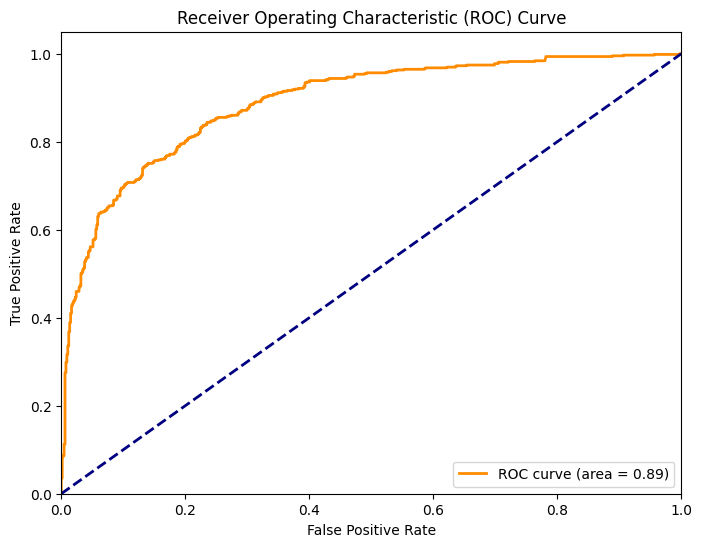

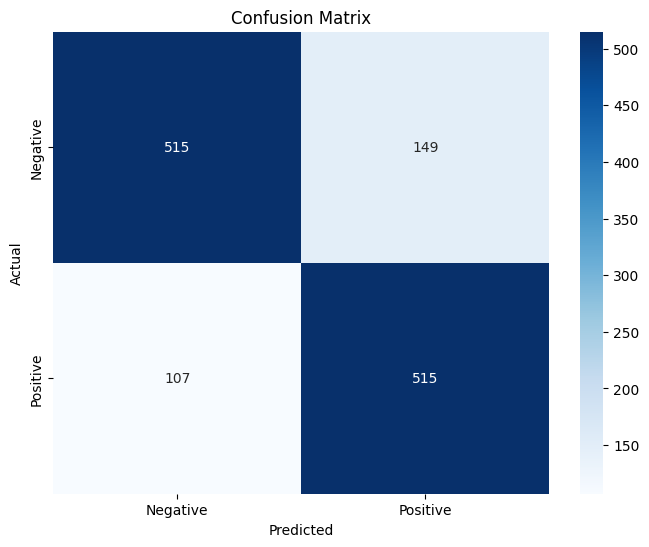

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Get predicted probabilities for ROC curve
y_pred_prob = best_svm.decision_function(X_test_tfidf)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7869362363919129


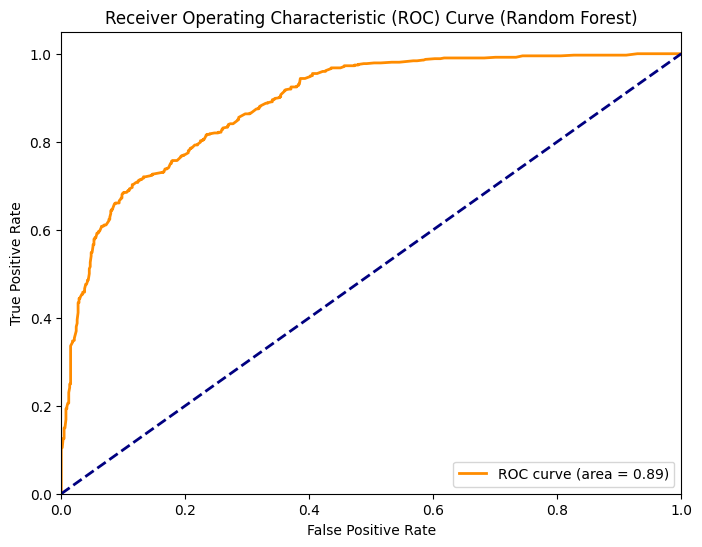

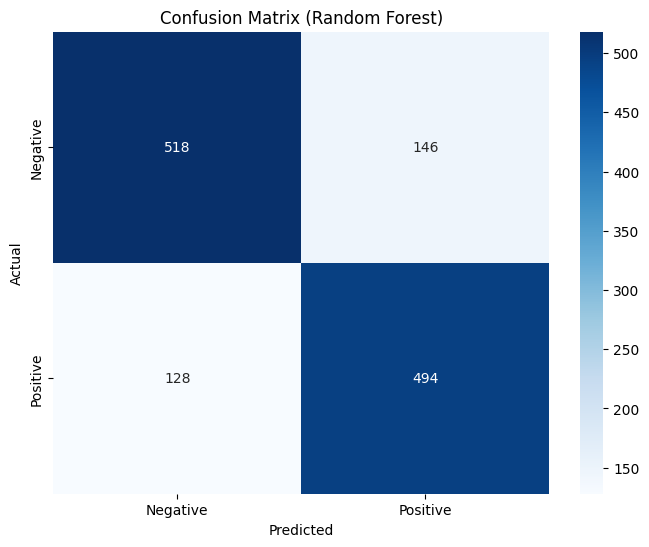

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Get predicted probabilities for ROC curve
y_pred_prob_rf = rf_classifier.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Accuracy: 0.7363919129082426


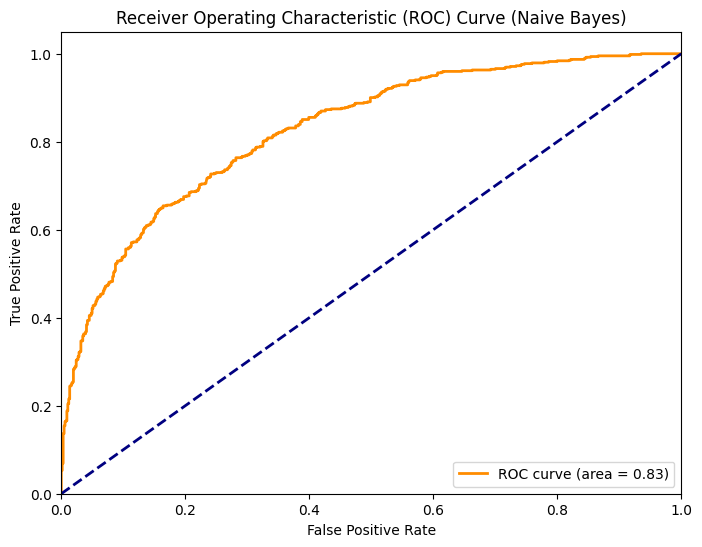

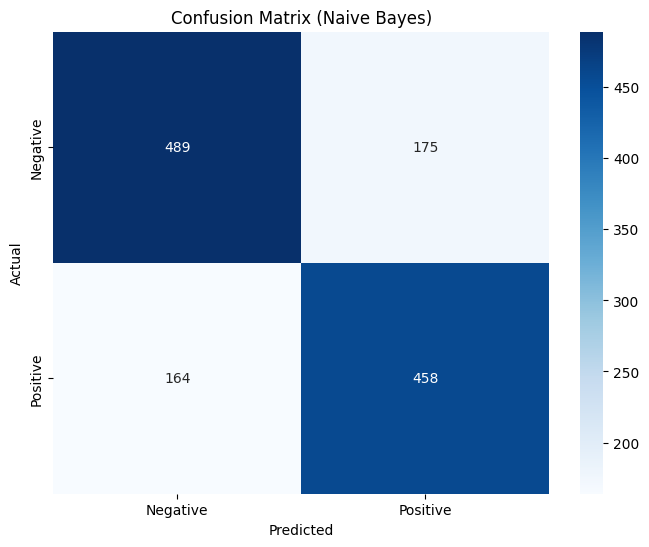

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create a Multinomial Naive Bayes classifier object
nb_classifier = MultinomialNB()

# Train the model using the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Get predicted probabilities for ROC curve
y_pred_prob_nb = nb_classifier.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

Accuracy: 0.7534992223950233


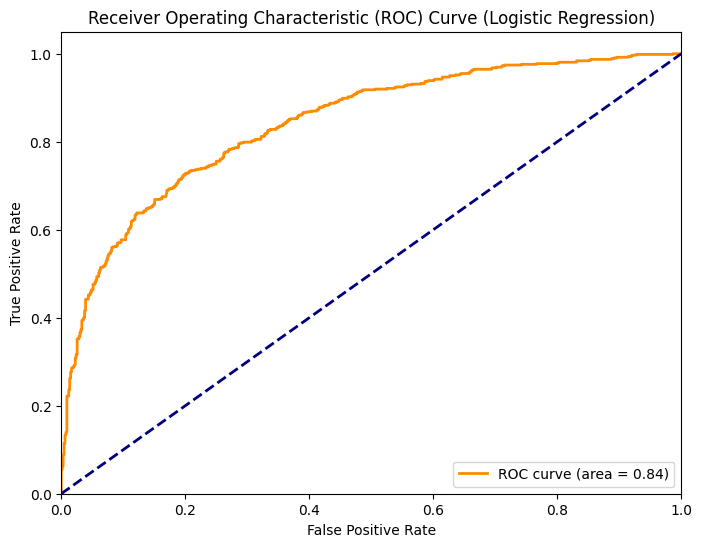

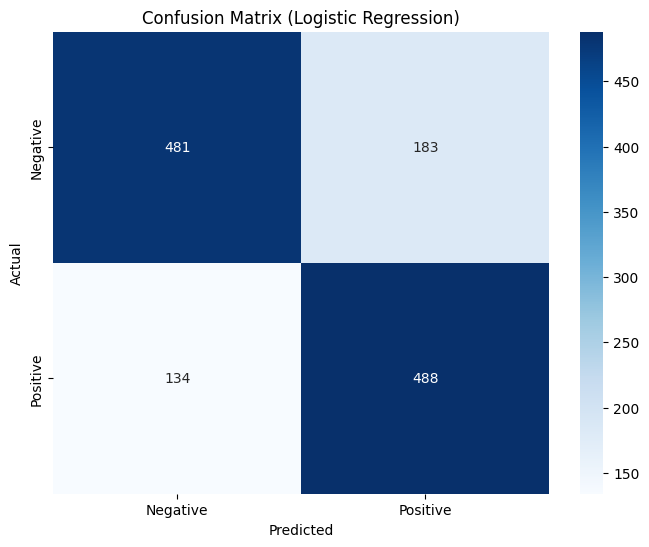

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Logistic Regression classifier object
lr_classifier = LogisticRegression(random_state=42)

# Train the model using the training data
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Get predicted probabilities for ROC curve
y_pred_prob_lr = lr_classifier.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

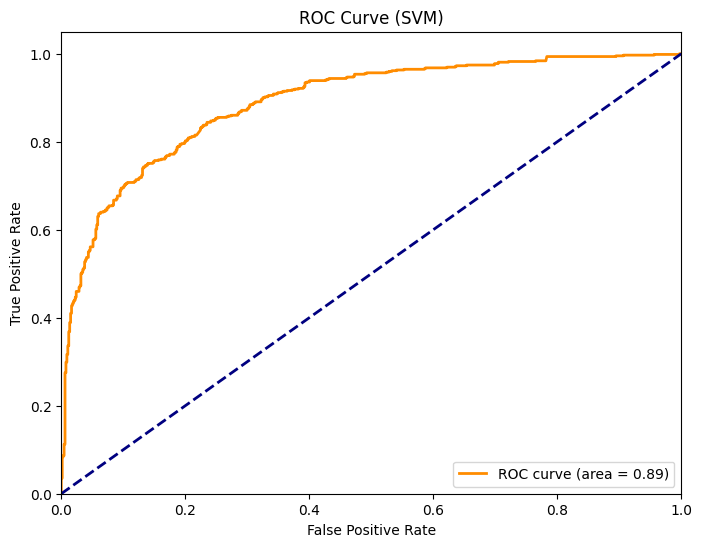

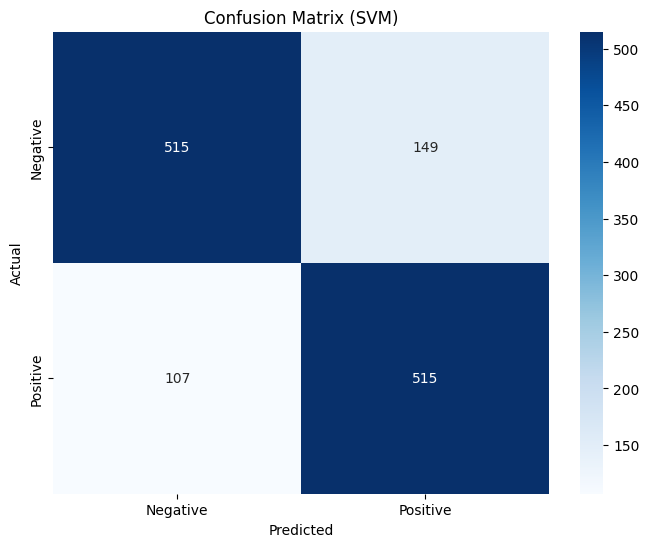

Best model: SVM
Cross-validation accuracy: 0.7784


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Define the models
models = {
    "SVM": SVC(probability=True),  # Enable probability estimates for SVM
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=42)  # Add Logistic Regression
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()

# Choose the best model based on cross-validation accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the full training data
best_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_tfidf)
y_pred_prob = best_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve ({best_model_name})')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_model_name})')
plt.show()

print(f"Best model: {best_model_name}")
print(f"Cross-validation accuracy: {results[best_model_name]:.4f}")

In [12]:
import pickle
pickle.dump(best_svm, open("svm_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [13]:
# Replace "your_data_file.csv" with the actual path to your CSV file
file_path = "/content/hindi sentiment analysis.csv"  # Or your actual file path
df = pd.read_csv(file_path)

In [14]:
!pip install gradio

In [16]:
import gradio as gr
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model and vectorizer
model = pickle.load(open("svm_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

def predict_sentiment(input_text):
    input_tfidf = vectorizer.transform([input_text])
    prediction = model.predict(input_tfidf)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter a Hindi tweet"),
    outputs="text",
    title="Hindi Tweet Sentiment Analysis",
    description="Enter a Hindi tweet to predict its sentiment.",
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e92bd34132adebfea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
